# PSO
    Particle Swarm Optimisation

| Aluno | Matrícula | e-mail |
| :--- | :--- | :--- |
| Gustavo Ribeiro | 2016026329 | gustavo435@ufmg.br |
| Hebert Costa | 2016097439 | hebert15@ufmg.br |

## Introdução

O PSO é uma Meta-heurística estocástica simples baseada em população e pertencente à categoria das técnicas de inteligência coletiva (swarmi ntelligence) (KENNEDYeEBERHART,1995). O seu método imita o comportamento coletivo de um grupo na busca pela sobrevivência na natureza, como a revoada de um bando de pássaros (bird flocking), cardume de peixes (fish schooling), formigueiro (ant colony), colméia de abelhas (bee colony) e outros.

Nas "nuvens" ou enxames formados pelos indivíduos,observa-se um comportamento coordenado de um grupo sem,no entanto, existir um controle central. Cada indivíduo movimenta-se de forma autônoma (movimentos locais). Por exemplo, um grupo de aves procura aleatoriamente alimentos em uma área. Qual a melhor estratégia para encontrar a única comida disponível? Seguir a ave mais próxima da comida. O PSo implementa esse comportamento.

Na presente atividade serão feitos testes do PSO com o funções já conhecidas no ramo da otimização: a __*peaks*__ e a __*rastrigin*__.

## Implementação

Imports

In [1]:
import typing
import math

import numpy as np
import matplotlib.pyplot as plt

from numpy import linalg as LA
from mpl_toolkits.mplot3d import Axes3D 

### Descrição

O PSO funciona a partir de algumas ideias básicas que são:

- PSO aprende com o cenário e o usa para resolver os problemas de otimização;
- No PSO, cada solução única é um "pássaro" no espaço de pesquisa. Nós a chamamos de "partícula”;
- Todas as partículas têm valores de aptidão que são avaliados pela função de custo para serem otimizadas e têm velocidades que direcionam o vôo das partículas;
- As partículas voam pelo espaço do problema seguindo as partículas ótimas atuais.

Além disso, a movimentação das partículas depende de regras definidas que seguem 3 fatores: Inércia, Memória, Cooperação.

Uma nuvem (swarm) é composta por $N$ " partículas" que voam pelo espaço de busca D-dimensional. Cada partícula $i$ pode ser uma solução para o problema que é representada pelo vetor $x_{i}$ no espaço das decisões.

O algoritmo implementado segue as características apresentadas em aula e possui basicamente duas classes. A classe *PSO* que inicia o ambiente com as partículas e com os parâmetros determinados. Essa classe possui 2 métodos:

- *__initParticles*: inicia aleatoriamente as partículas no espaço de busca de acordo com a função objetivo;
- *fit*: executa a busca no espaço executando o ajuste de velocidade das partículas e a movimentação delas de acordo com a cooperação das outras.

Para compor essa classe PSO foi criada a classe *Particle* que possui os métodos:

- *move*: movimenta a partícula de acordo com a veloidade determinada para ela;
- *updateVelocity*: atualiza a velocidade da partícula de acordo com os fatores de movimentação do método e os parámetros de referência.

### Particle

In [2]:

class Particle():
    '''
        TODO: 2022-02-11 - ADD Description
    '''

    def __init__(self, fObj: typing.Callable, initialPos: np.array, velMax=1., rhoMax=2., c1=1, c2=1, w=1):
        '''
            PARAMS
            - fObj: Objective function;
            - initialPos: Initial Position;
            - c1: Cognitive learning factor (weights how much individual progress is taken into account);
            - c2: Social learning factor (weights how much collective progress is taken into account);
            - velMax: Maximum absolute velocity value;
            - rhoMax: Maximum value for the random acceleration coefficients;
        '''
        self.w = w
        self.c1 = c1
        self.c2 = c2

        self.fObj = fObj
        self.velMax = velMax
        self.rhoMax = rhoMax
        self.velocity = np.zeros( (initialPos.size, ) )

        self.bestFit = np.Infinity
        self.position = initialPos
        self.bestPosition = self.position

    def move(self):
        self.position += self.velocity

        fit = self.fObj(self.position)
        if fit < self.bestFit:
            self.bestFit = fit
            self.bestPosition = self.position

    def updateVelocity(self, groupPosition: np.array) -> None:
        '''
            PARAMS
            - groupPosition: Best group position known so far;
        '''

        # Calculates new velocity        
        rho1 = self.rhoMax * float(np.random.rand(1))
        rho2 = self.rhoMax * float(np.random.rand(1))
        
        inertia = self.w * self.velocity
        ownKnowledge = self.c1 * rho1 * (self.bestPosition - self.position)
        globalKnowledge = self.c2 * rho2 * (groupPosition - self.position)
        
        # Assure it is between limits
        self.velocity = inertia + ownKnowledge + globalKnowledge
        self.__adjustVelocity()

    def __adjustVelocity(self) -> None:
        '''
            TODO: 2022-02-11 - ADD Description
        '''

        while LA.norm(self.velocity) > self.velMax:
            rate = LA.norm(self.velocity) / self.velMax
            diff, _ = math.modf(1 - rate)
            self.velocity -= math.fabs(diff) * self.velocity


### PSO

In [3]:
class PSO():
    '''
        TODO: 2022-02-11 - ADD Description
    '''

    def __init__(self, fObj: typing.Callable, bounds: list, nParticles: int, velMax=1., rhoMax=2., c1=1., c2=1., w=1., maxEpochs=1000):

        self.bestFit = np.Infinity
        self.particles = list()
        self.maxEpochs = maxEpochs
        self.bestPosition = np.array([])

        self.__initParticles(
            fObj=fObj, bounds=bounds, nParticles=nParticles, velMax=velMax,
            rhoMax=rhoMax, c1=c1, c2=c2, w=w,
        )

    def __initParticles(self,
        fObj: typing.Callable, bounds: list, nParticles: int, velMax: float,
        rhoMax: float, c1: float, c2: float, w: float,
    ) -> None:
        '''
            TODO: 2022-02-11 - ADD Description
        '''
        
        # Initialize particles population
        nFeatures = len(bounds)
        minB, maxB = np.asarray(bounds).T

        initialPos = minB + np.fabs(minB - maxB) * np.random.rand(nParticles, nFeatures)
        self.particles = [Particle(fObj=fObj, initialPos=initialPos[i, :], velMax=velMax, rhoMax=rhoMax, c1=c1, c2=c2, w=w) for i in range(nParticles)]
        
        # Initialize group knowledge
        bestIdx = np.argmin([self.particles[i].bestFit for i in range(nParticles)])
        bestParticle = self.particles[bestIdx]

        self.bestFit = bestParticle.bestFit
        self.bestPosition = bestParticle.bestPosition

    def fit(self) -> typing.Generator[tuple, None, None]:
        '''
            TODO: 2022-02-11 - ADD Description
        '''

        for i in range(self.maxEpochs):
            for particle in self.particles:

                # Update group
                if particle.bestFit < self.bestFit:
                    self.bestFit = particle.bestFit
                    self.bestPosition = particle.bestPosition
            for particle in self.particles:
                # Update particle
                particle.updateVelocity(self.bestPosition)
                particle.move()

            yield self.bestPosition, self.bestFit

## Teste

Na presente seção serão feitos dois testes com o PSO utilizando duas funções já conhecidas e apresentadas ema tividades anteriores: a peaks e a rastrigin.

### Peaks

#### Função Objetivo

In [1]:
# Implementação da função peaks
peaks = lambda X: \
    (3*(1 - X[0])**2 * np.exp(-X[0]**2 - (X[1] + 1)**2)) \
    + (-10*(X[0] / 5 - X[0]**3 - X[1]**5) * np.exp(-X[0]**2 - X[1]**2)) \
    + (-(1 / 3) * np.exp(-(X[0] + 1)**2 - X[1]**2))

# Teste com o mínimo global conhecido
peaks(np.array([0.228 , -1.625]))

NameError: name 'np' is not defined

#### Plot

/tmp/ipykernel_47254/3825413550.py:12: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


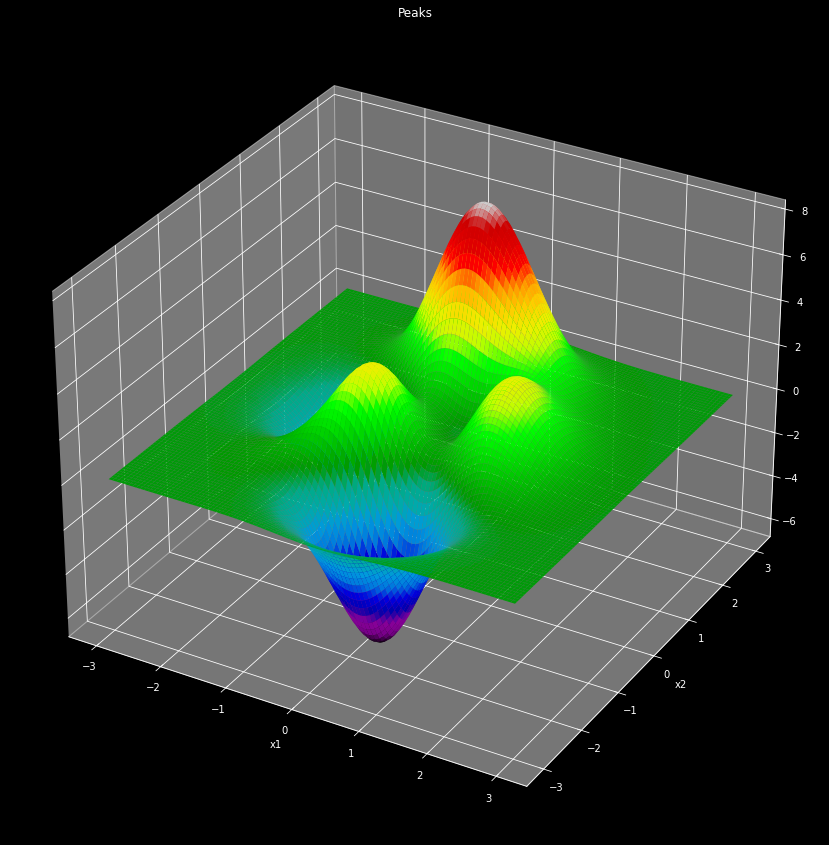

Text(0, 0.5, 'x2')

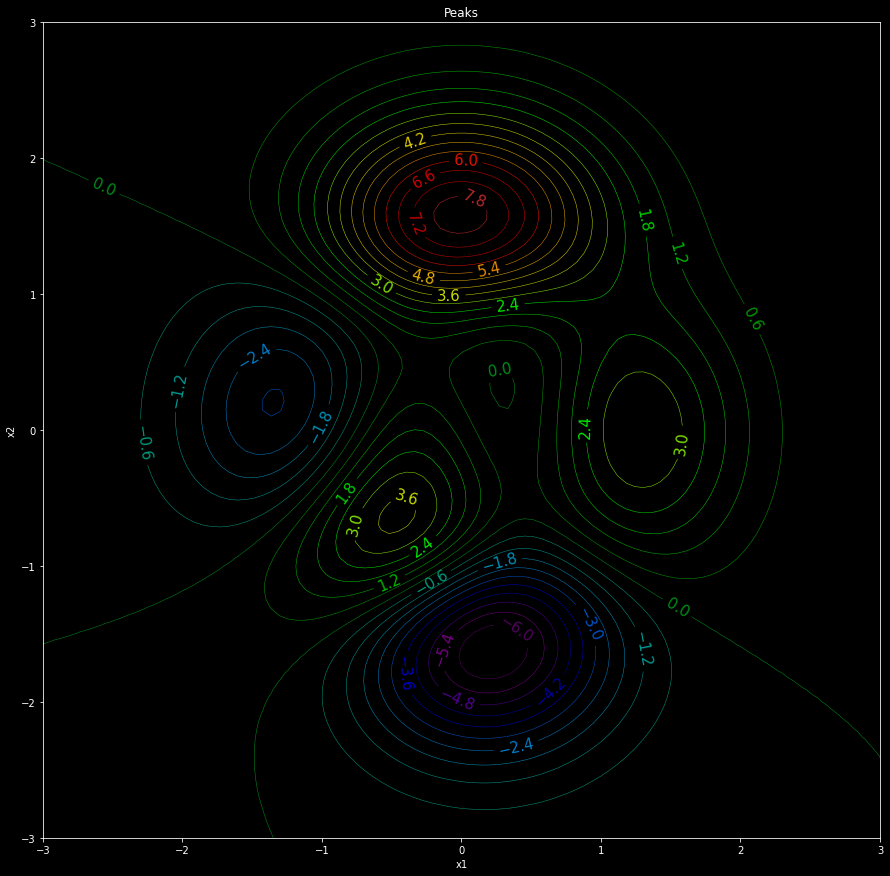

In [5]:
# Build plot data 
min1, max1 = (-3, 3)
min2, max2 = (-3, 3)
n = 100
x1 = np.linspace(min1, max1, n)
x2 = np.linspace(min2, max2, n)
X1, X2 = np.meshgrid(x1, x2)
Z = peaks(np.array([X1, X2]))

# Plot surface
fig = plt.figure(figsize=(15, 15)) 
ax = fig.gca(projection='3d')
ax.plot_surface(
  X1, X2, Z,
  rstride=1, cstride=1, cmap=plt.cm.nipy_spectral, linewidth=0.08, antialiased=True
)

ax.set_title('Peaks')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# Plot contour
fig, ax = plt.subplots(figsize=(15, 15))
CS = ax.contour(X1, X2, Z, cmap=plt.cm.nipy_spectral, alpha=.9, locator=matplotlib.ticker.MaxNLocator(nbins=25), linewidths=.5)
ax.clabel(CS, CS.levels, inline=True, fontsize=15)

ax.set_title('Peaks')
plt.xlabel('x1')
plt.ylabel('x2')

#### Otimização

De acordo com o plot da função acima percebe-se que o mínimo global está presente na origem __[0.228 , -1.625]__ com o valor de __-6.5511__. O esperado é de que o PSO consiga econtrar uma posição muito próxima desse mínimo. Para isso, foram utilizadas 50 partículas com os parâmetros de movimentação determinados seguindo as recomendações da literatura. 

In [6]:

maxEpochs = 1500
bounds1 = (-3, 3)
bounds2 = (-3, 3)

nParticles = 50; # Recommended: 20 ~ 60

w = .3  # Innertia (recommended: .3 ~ .7)
c1 = .5  # Cognitive learning factor (recommended: .5 ~ 1.5)
c2 = 1.5  # Social learning factor (recommended: .5 ~ 1.5)

velMax = .5 # Recommended: .2 ~ 1
rhoMax = 1  # Acceleration factor max value (recommended: 0 ~ 2)

pso = PSO(
    fObj=peaks, bounds=[bounds1, bounds2], nParticles=nParticles, velMax=velMax,
    rhoMax=rhoMax, c1=c1, c2=c2, w=w, maxEpochs=maxEpochs
)
for value in pso.fit():
    value
print(value)


(array([ 0.2019895 , -1.60680349]), -6.550276775015811)


De acordo com a execução do método acima a solução encontrada no valor de __-6.551131__ na posição __[0.226468  , -1.62286875]__. Pelo desvio muito pequeno da origem e do mínimo global conhecido conclui-se que para a função *peaks* o método funcionou muito bem.

### Rastrigin

#### Função Objetivo

In [7]:
rastrigin = lambda X: (X[0]**2 - 10 * np.cos(2 * np.pi * X[0])) + (X[1]**2 - 10 * np.cos(2 * np.pi * X[1])) + 20

# Teste da função com o mínimo global
rastrigin(np.array([0 , 0]))

0.0

#### Plot

/tmp/ipykernel_47254/256864025.py:12: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


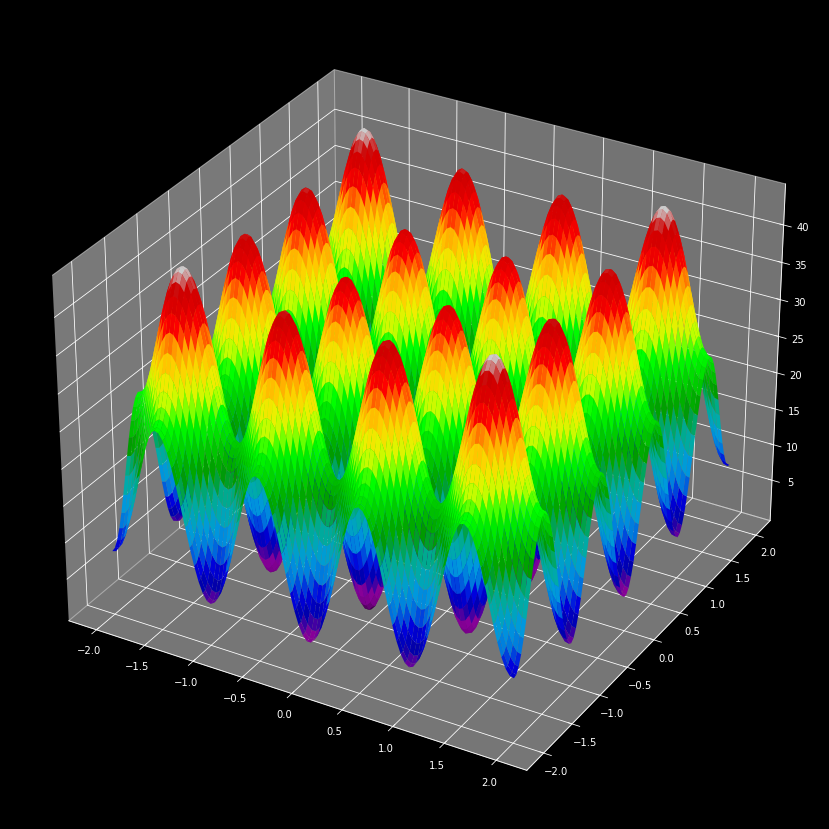

<a list of 379 text.Text objects>

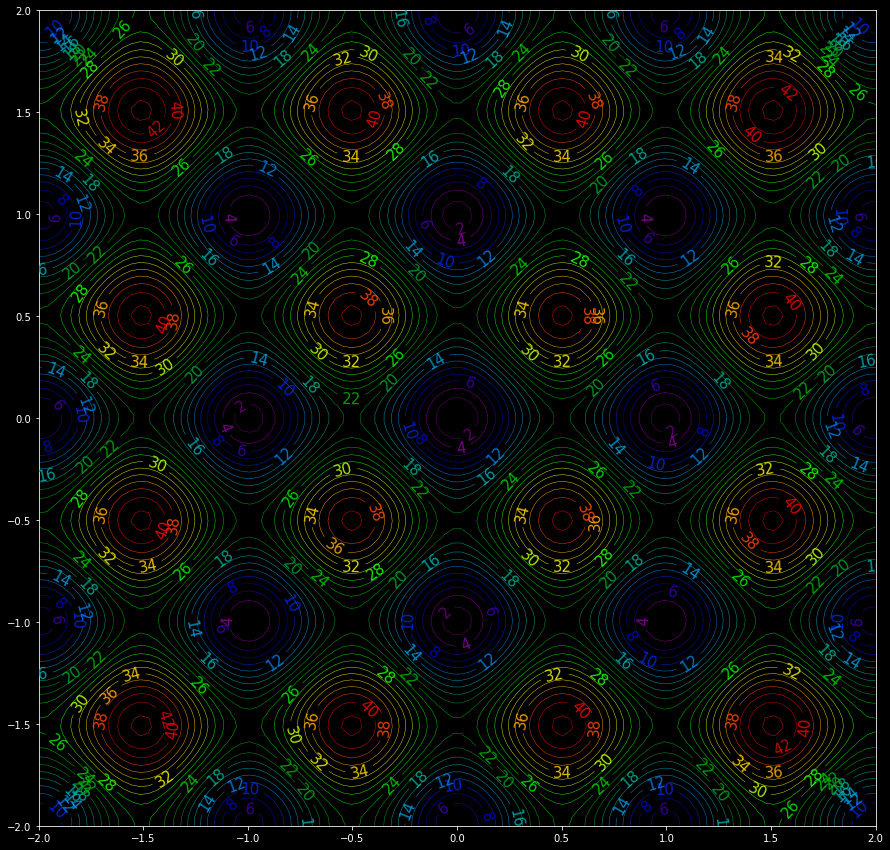

In [8]:

# Build plot data 
min1, max1 = (-2, 2)
min2, max2 = (-2, 2)
n = 100
x1 = np.linspace(min1, max1, n)     
x2 = np.linspace(min2, max2, n)     
X1, X2 = np.meshgrid(x1, x2) 
Z = rastrigin([X1, X2])

# Plot surface 
fig = plt.figure(figsize=(15, 15)) 
ax = fig.gca(projection='3d')
ax.plot_surface(
  X1, X2, Z,
  rstride=1, cstride=1, cmap=plt.cm.nipy_spectral, linewidth=0.08, antialiased=True
)
plt.show()

# Plot contour
fig, ax = plt.subplots(figsize=(15, 15))
CS = ax.contour(X1, X2, Z, cmap=plt.cm.nipy_spectral, alpha=.9, locator=matplotlib.ticker.MaxNLocator(nbins=25), linewidths=.5)
ax.clabel(CS, CS.levels, inline=True, fontsize=15)


#### Otimização Rastrigin

De acordo com o plot da função acima percebe-se que o mínimo global está presente na origem __[0, 0]__ com o valor de __0__. O esperado é de que o PSO consiga econtrar uma posição muito próxima da origem. Para isso, foram utilizadas 50 partículas com os parâmetros de movimentação determinados seguindo as recomendações da literatura. 

In [9]:

maxEpochs = 1500
bounds1 = (-2, 2)
bounds2 = (-2, 2)

nParticles = 50; # Recommended: 20 ~ 60

w = .3  # Innertia (recommended: .3 ~ .7)
c1 = .5  # Cognitive learning factor (recommended: .5 ~ 1.5)
c2 = 1.5  # Social learning factor (recommended: .5 ~ 1.5)

velMax = .5 # Recommended: .2 ~ 1
rhoMax = 1  # Acceleration factor max value (recommended: 0 ~ 2)

pso = PSO(
    fObj=rastrigin, bounds=[bounds1, bounds2], nParticles=nParticles, velMax=velMax,
    rhoMax=rhoMax, c1=c1, c2=c2, w=w, maxEpochs=maxEpochs
)
for value in pso.fit():
    value
print(value)


(array([0.01588359, 0.02759617]), 0.0004677103297723306)


De acordo com a execução do método acima a solução encontrada no valor de __0.000337__ na posição __[-0.00592993, 0.00156784]__. Pelo desvio muito pequeno da origem e do mínimo global conhecido conclui-se que para a função *ratrigin* o método funcionou muito bem.